## Pandas 

### Three fundermental Pandas data Structures 

#### Series as a generalized Numpy Array

In [1]:
import pandas as pd

data = pd.Series([0.25,0.5,0.75,1.0])
print(data)
data.values, data.index, data[1]

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


(array([0.25, 0.5 , 0.75, 1.  ]),
 RangeIndex(start=0, stop=4, step=1),
 np.float64(0.5))

In [15]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['apple','banana','cabbage','donuts'])
data2 = pd.Series([0,2,3,4], index=[2,3,4,5])
data , data2

(apple      0.25
 banana     0.50
 cabbage    0.75
 donuts     1.00
 dtype: float64,
 2    0
 3    2
 4    3
 5    4
 dtype: int64)

#### Series as a specialized dictionary 

In [2]:
import pandas as pd
population_dict = {
'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135
}

population = pd.Series(population_dict)
population
# population['California':'Florida'].values

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### The Pandas DataFrame Object 

#### DataFrame as a generalized NumPy Array

In [2]:
import pandas as pd

population_dict = {
'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135
}

population = pd.Series(population_dict)
population
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'Population':population, 'Area':area})
states['Population Density'] = states['Population'] / states['Area']
states

,Population,Area,Population Density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [13]:
import pandas as pd

population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}

area_dict = {'California': 423967, 'Texas'Florida       170312
: 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}

population = pd.Series(population_dict)
area = pd.Series(area_dict)

states_dict = {'population': population, 'area': area }
states = pd.DataFrame(states_dict)

print(states)
states['area']


            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### DataFrame as a specialized Dictionary

In [30]:
import numpy as np
import pandas as pd
dtype = [('A','i8'),('B','f8')]
A = np.zeros(3, dtype = dtype)
print(A)
Adata = pd.DataFrame(A)
print(Adata)
# Aindex = pd.Index(A)
# Aindex[:2]

[(0, 0.) (0, 0.) (0, 0.)]
   A    B
0  0  0.0
1  0  0.0
2  0  0.0


In [32]:
ind = pd.Index([2, 3, 5, 7, 11])
ind[::2]

Index([2, 5, 11], dtype='int64')

#### Practice

In [1]:
# Exercise 

import pandas as pd
import numpy as np

file = pd.read_csv('president.csv')
data = np.array(file)
data[:,0], data[:,1], data[:,2]
# np.hsplit(data,3)[0] ~ data[:,0]
# Now we assign them using DataFrame and Series from the pandas Library

presidents = pd.Series(data[:,1], index=data[:,0])
heights = pd.Series(data[:,2], index=data[:,0])
# info_dict = {'Presidents': presidents, 'heights':heights}
# info = pd.DataFrame(info_dict) 

info = pd.DataFrame(data[:,1:], columns=['Presidents','Heights'] , index=data[:,0])
info.describe()

,Presidents,Heights
count,20,20
unique,20,17
top,George Washington,189
freq,1,2


### Data Selection and Indexing 

In [8]:
import pandas as pd

data = pd.Series([0.25,0.5,0.75,1.0], index = ['a','b','c','d'])
data['e'] =0.7 
data
# data.keys()
# list(data.items())

a    0.25
b    0.50
c    0.75
d    1.00
e    0.70
dtype: float64

In [2]:
import numpy 
import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0], index = ['a','b','c','d'])
data[(data > 0.3) & (data < 0.8)].sum()
# data.sum()

np.float64(1.25)

### Indexers (loc,iloc and ix)

In [8]:
data = pd.Series(['a', 'b', 'c', 'd'], index=[1, 3, 5,7])
data
print(data.loc[:4])
print()
print(data.iloc[:3])
print(data[:4])

1    a
3    b
dtype: object

1    a
3    b
5    c
dtype: object
1    a
3    b
5    c
7    d
dtype: object


In [43]:
import random
import numpy as np
import pandas as pd 
np.random.seed(1)
my_array = np.random.randint(12, size=12).reshape((3,4))
my_array = pd.DataFrame(my_array, columns=['A', 'B', 'C', 'D'] )
my_array

,A,B,C,D
1,5,11,8,9
2,11,5,0,0
3,1,7,6,9


#### Exercise 

In [11]:
import pandas as pd
import numpy as np

file = pd.read_json('food_data.json')
data = np.array(file['meals'])
# print(data)
my_array = []
for i ,row in enumerate(data):
    my_array.append([row['strMeal'], row['strArea'],row['strTags'],row['strInstructions']])
my_array = np.array(my_array) 
index_array = np.arange(len(my_array))
index_array += 1 

for i in range(len(my_array)):
    my_array[:,3][i] = str(my_array[:,3][i]).replace('\r\n', '').replace('\\r\\n', '').replace('0.\t', '').replace('\t', '')
    # my_array[:,2][i] = str(my_array[:,2][i]) + ''

    # if my_array[:,2][i] is None:
    #     my_array[:,2][i] = 'No Tag'

data_dict = {
             'Meal Name':my_array[:,0],
             'Origin':my_array[:,1], 
             'Tags ':my_array[:,2], 
             'Instructions':my_array[:,3]
            }
# pd.set_option('display.max_colwidth', None)
my_dataframe = pd.DataFrame(data_dict, index=index_array)
# my_dataframe.loc[my_dataframe['Tags'].isnull(), 'Tags'] = 'No Tag'

my_dataframe[my_dataframe.isnull()] = 'No Tag'
my_dataframe.isnull().any()

Meal Name       False
Origin          False
Tags            False
Instructions    False
dtype: bool

#### UFuncs: Index Alignment

In [12]:
import pandas as pd
import random as rng
import numpy as np
# A = pd.Series([2, 4, 6], index=[0, 1, 2])
# B = pd.Series([1, 3, 5], index=[1, 2, 3])
# A.add(B,fill_value =0)


A = pd.DataFrame(np.arange(0, 20).reshape((2,10)))
print(A.T)
# B = pd.DataFrame(np.arange(0, 10).reshape((3,3)),columns=list('BAC'))
# print(B)

   0   1
0  0  10
1  1  11
2  2  12
3  3  13
4  4  14
5  5  15
6  6  16
7  7  17
8  8  18
9  9  19


In [39]:
import numpy as np
import random
import pandas as pd
random.seed(0)
array_a = np.random.randint(6, size=8)
array_b = np.random.randint(6,size=7)
series_a = pd.Series(array_a, index=[1,2,3,4,5,6,7,8])
series_b = pd.Series(array_b, index=[1,2,3,4,5,6,7])
series_a.add(series_b,fill_value = 0)

1     3.0
2     3.0
3    10.0
4     4.0
5     5.0
6     6.0
7     8.0
8     2.0
dtype: float64

#### Handling Missing data 

In [82]:
# vals1 = np.array([1, None, 3, 4])  
# vals1.sum()
import numpy as np
vals2 = np.array([1, np.nan, 3, 4])
print(np.nansum(vals2))
print(np.sum(vals2))
# np.nansum, np.nanmax, np.nanmin  // Handling numerical missing data 

8.0
nan


#### Operating on Null Values 

In [92]:
data = pd.Series([1, np.nan, 2, None])
data[data.isnull()] = 0
# data[data.notnull()].sum()

data

0    1.0
1    0.0
2    2.0
3    0.0
dtype: float64

##### isnull()
##### Generate a Boolean mask indicating missing values
##### notnull()
##### Opposite of isnull()
##### dropna()
##### Return a filtered version of the data
##### fillna()
##### Return a copy of the data with missing values filled or imputed

#### Multiply Indexed Series 

In [1]:
import numpy as np
import pandas as pd

index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]

pop = pd.Series(population , index = index)

index = pd.MultiIndex.from_tuples(index)
index  
pop = pop.reindex(pop)

pop

NameError: name 'population' is not defined

In [14]:
import numpy as np
import pandas as pd
np.random.seed(0)

index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['Subject', 'Type'])
# print(index)
# print(columns)
data  = np.abs(np.random.random(24)).reshape((4,6))
data *= 100
# data1 = pd.Series(data[:,0])
# data2 = pd.Series(data[:,1]) 
# data3 = pd.Series(data[:,2])    
# data4 = pd.Series(data[:,3])
# data5 = pd.Series(data[:,4])
# data6 = pd.Series(data[:,5])
full_d = pd.DataFrame(data ,index=index, columns=columns)
full_d

Subject           Bob                 Guido                   Sue           
Type               HR       Temp         HR       Temp         HR       Temp
year visit                                                                  
2013 1      54.881350  71.518937  60.276338  54.488318  42.365480  64.589411
     2      43.758721  89.177300  96.366276  38.344152  79.172504  52.889492
2014 1      56.804456  92.559664   7.103606   8.712930   2.021840  83.261985
     2      77.815675  87.001215  97.861834  79.915856  46.147936  78.052918

In [2]:
import numpy as np
import pandas as pd

index = pd.MultiIndex.from_product([['a','c','b'], [1,2]])
data = pd.Series(np.random.rand(6), index= index)
data.index.names = ['char', 'int']
print(data)
data.sort_index()

char  int
a     1      0.879593
      2      0.537158
c     1      0.564375
      2      0.597359
b     1      0.981746
      2      0.354971
dtype: float64


char  int
a     1      0.879593
      2      0.537158
b     1      0.981746
      2      0.354971
c     1      0.564375
      2      0.597359
dtype: float64

#### Simple concatination with pd.concat

In [4]:
import pandas as pd

ser1 = pd.Series(['A','B','C'], index=[1,2,3])
ser2 = pd.Series(['E','F','G'], index=[6,5,4])
allser = pd.concat([ser1,ser2])
allser.sort_index()
# pd.merge(ser1,ser2) 

1    A
2    B
3    C
4    G
5    F
6    E
dtype: object

### Joins

In [22]:
import numpy as np
import pandas as pd

df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'] )

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                    columns=['name', 'drink'])

all_pd  = pd.merge(df6,df7 ,how = 'outer', on='name') # Outer join , inner join use (inner)
# You can also use it based on the column. eg : (how = 'outer', on = 'name') 

all_pd.loc[all_pd['food'].isnull(), 'food'] = 'No food'
all_pd.isnull().any()
all_pd.loc[all_pd['drink'].isnull(), 'drink'] = 'No drink'

all_pd.index  = np.arange(1, len(all_pd)+1) 
all_pd
# all_merge = pd.merge(df6,df7, on='name' , how= 'outer') 
# all_merge

,name,food,drink
1,Joseph,No food,beer
2,Mary,bread,wine
3,Paul,beans,No drink
4,Peter,fish,No drink


In [4]:
# US STATES DATA 
import numpy as np
import pandas as pd

stateabv = pd.read_csv('state-abbrevs.csv')
stateareas = pd.read_csv('state-areas.csv')
statepop = pd.read_csv('state-population.csv')
# pd.options.mode.copy_on_write = True
states = pd.merge(stateabv, stateareas, how = 'outer', on = 'state') 
# states[states.isnull()] = 'No Code'
# abv = states['abbreviation']
# abv[abv.isnull()] = 'None'
# states.index = np.arange(1,len(states)+1)

# stateabv.head(), stateareas.head(), statepop.head()

# data = pd.merge(states, statepop, how= 'outer', left_on = 'state', right_on = 'state/region')
# data

data = pd.merge(statepop,stateabv, how= 'outer', left_on = 'state/region', right_on = 'abbreviation')
data.index = np.arange(1,len(data)+1)
states

# if data.isnull().any() is False:
#    data[data.isnull()] = 'None'

data.isnull().any()  # Checking if any data is null 

data[data['population'].isnull()] # Displays the null part of the data for population

# data.loc[data['state'].isnull(), 'state/region'].unique()

# data[data['state'].isnull()] = 'Puerto Rico'
            
data.loc[data['state/region'] == 'PR' , 'state' ] = 'Puerto Rico'
data.loc[data['state/region']=='USA' , 'state'] = 'America'
data[data['population'].isnull()]

# if data['state/region'].any() == 'AK':
#     data['state/region']  
data.loc[data['state'] == 'America', 'state/region']

data.loc[data['state/region'] == 'USA'] # Displaying all data (data) where state/region equals USA

# data2000 = data.loc[data['year'] >= 2000]  
# data2000
# data2000.head()


final = pd.merge(data, stateareas, on = 'state', how='left')
final.loc[final['state/region'] == 'WY']
final.isnull().any()

final.loc[final['abbreviation'].isnull()]

final.loc[final['state/region'] == 'PR', 'abbreviation'] = 'PR'

final.loc[final['state/region'] == 'PR']

final.loc[final['state/region'] == 'USA', 'abbreviation'] = 'USA'

final.isnull().any()

# Dealing with area 
final.loc[final['area (sq. mi)'].isnull(), 'state']
final.loc[final['area (sq. mi)'].isnull()] = 0 
final.isnull().any()

#Dealing with population 
final.loc[final['population'].isnull()] = 0
final.isnull().any()

# Missing data corrected :)
final_data = final
final_data
final_data.index = np.arange(1,len(final_data)+1)

final_data.isnull().any()
final_data['Population Density'] = final_data['population'] / final_data['area (sq. mi)']
final_data.loc[final_data['year'] == 2010]

query_data = final_data.query("year == 2010 & ages == 'total'") # require numexpr to be installed  
query_data = query_data.sort_values(by= 'Population Density')
query_data.index = np.arange(1,len(query_data)+1)
query_data.to_csv('america.csv' ,index= False )
query_data

,state/region,ages,year,population,state,abbreviation,area (sq. mi),Population Density
1,AK,total,2010,713868.0,Alaska,AK,656425.0,1.087509
2,WY,total,2010,564222.0,Wyoming,WY,97818.0,5.768079
3,MT,total,2010,990527.0,Montana,MT,147046.0,6.736171
4,ND,total,2010,674344.0,North Dakota,ND,70704.0,9.537565
5,SD,total,2010,816211.0,South Dakota,SD,77121.0,10.583512
6,NM,total,2010,2064982.0,New Mexico,NM,121593.0,16.982737
7,ID,total,2010,1570718.0,Idaho,ID,83574.0,18.794338
8,NE,total,2010,1829838.0,Nebraska,NE,77358.0,23.654153
9,NV,total,2010,2703230.0,Nevada,NV,110567.0,24.448796
10,UT,total,2010,2774424.0,Utah,UT,84904.0,32.677188


### Aggregation and grouping  

##### Planets Data 

In [49]:
import seaborn as sns
import numpy as np
planets = sns.load_dataset('planets')
planets.index = np.arange(1,len(planets)+1)
# planets[planets['method'] != 'Radial Velocity'] 
# planets.dropna().describe()

p_group = planets.groupby('method')

p_group['orbital_period'].median() 

# for method,group in planets.groupby('method'): 
#     print(f'method: {method} , shape: {group.shape}')

# p_group['year'].describe()

p_group.sum()

# planets.groupby('method').sum() 

# for (method,group) in p_group:
#     print("{0:.30s} shape={1}".format(method, group.shape))


for method, group in planets.groupby('method'):
     print("{0:30s} shape={1}".format(method, group.shape)) 

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [6]:
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data':range(6)
})  
df.groupby('key').sum()  

,data
key,
A,3
B,5
C,7


In [35]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(0) 
df = pd.DataFrame({
    'key': ['A','B','C','A','B','C'],
    'data1': range(6),
    'data2': rng.randint(0,10,6)
}, columns=['key', 'data1', 'data2'] , index = np.arange(1,7))
df.groupby('key').aggregate(['min', 'median', 'max', 'std']) , df

std_df = df.groupby('key').std()
std_df.loc[std_df['data2'] > 4 , 'data2']

# df.loc[df['data2'] > 4]

key
B    4.949747
C    4.242641
Name: data2, dtype: float64

Which price_type do you want to check for its relationship?(Open,Close,High,Low) High


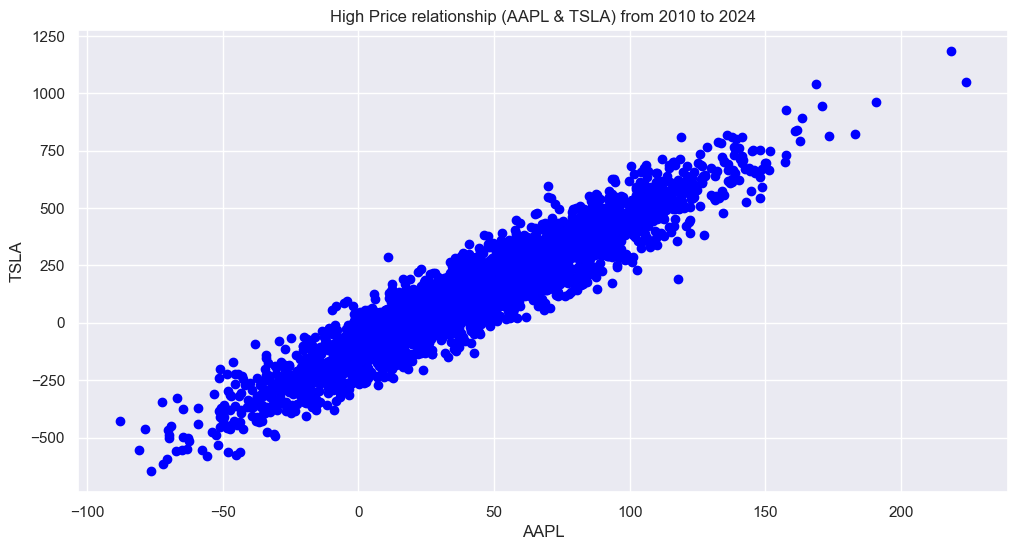

In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

seaborn.set()
np.random.RandomState(0)

TSLA = pd.read_csv('TSLA.csv')
AAPL = pd.read_csv('AAPL.csv')

AAPL = AAPL.query(" Date >=  '2010-06-29' & Date <= '2022-03-24' ")
AAPL.index = np.arange(1,len(AAPL)+1)
TSLA.index =  np.arange(1,len(TSLA)+1)
len(AAPL), len(TSLA)

AAPL_dict = {
    'Open':AAPL['Open'],
    'Close':AAPL['Close'],
    'High':AAPL['High'],
    'Low':AAPL['Low'],
}

TSLA_dict = {
    'Open':TSLA['Open'],
    'Close':TSLA['Close'],
    'High':TSLA['High'],
    'Low':TSLA['Low'],
}

AAPL_data = pd.DataFrame(AAPL_dict)
TSLA_data = pd.DataFrame(TSLA_dict)


def stock_rel( price_type ):
    mean_list = [AAPL_data[ price_type ].mean() , TSLA_data[ price_type ].mean()]    
    df_cov = pd.DataFrame({
        'AAPL_cov': AAPL_data[ price_type ],
        'TSLA_cov': TSLA_data[ price_type ]
    })
    get_rel = np.random.multivariate_normal(mean_list, df_cov.cov(), len(TSLA_data[ price_type ]))
    plt.figure(figsize=(12,6))
    plt.title(f'{price_type} Price relationship (AAPL & TSLA) from 2010 to 2024')
    plt.xlabel('AAPL')
    plt.ylabel('TSLA')
    plt.scatter(get_rel[:,0], get_rel[:,1] , color='blue', marker= 'o')
    plt.show()
    return

if __name__ == '__main__':
    question = input('Which price_type do you want to check for its relationship?(Open,Close,High,Low)')
    question = str(question).strip()
    stock_rel(question)
